## Visualización

En este notebook se realizar todas las acciones referentes a gráficas e interpretaciones de las mismas

In [430]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [322]:
df_clean = pd.read_csv('C:/Users/valef/Desktop/DIPLOMADO UDD/python/ProyectoPython/NOTEBOOK/data_cleaned.csv') #se carga el DataSet
#df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

**A continuación se grafica la cantidad de reservas canceladas y las reservas efectivas**

is_canceled
0    0.628648
1    0.371352
Name: proportion, dtype: float64


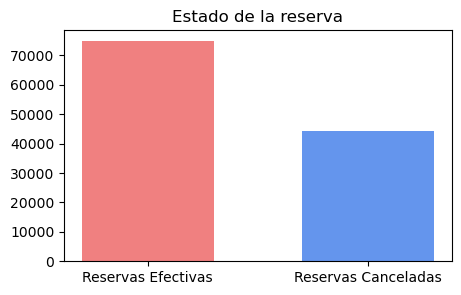

In [64]:
# Se calcula el porcentaje de cancelación
cancelled_perc = df_clean['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

#se grafica par saber cuantas de las resevas se hacen efectivas
colors = sns.color_palette(["#F08080", "#6495ED"])

plt.figure(figsize = (5,3),facecolor="#FFFFFF")
plt.title('Estado de la reserva')
plt.bar(['Reservas Efectivas' , 'Reservas Canceladas'],df_clean['is_canceled'].value_counts(), width = 0.6,color=colors)
plt.show()

**Ahora se grafica la tasa de reservas efectivas y la tasa de cancelación**

Tasa de cancelación global: 0.37
Tasa de no cancelación: 0.63


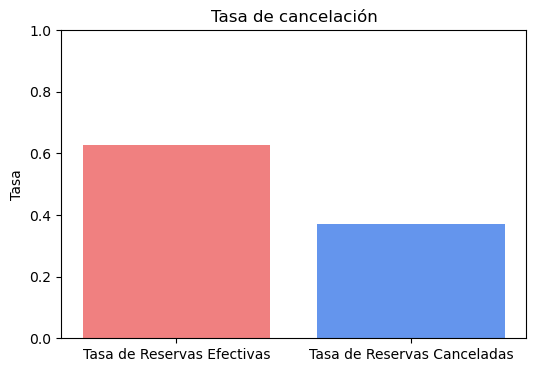

In [66]:
# Calcular el número total de reservas
total_reservas = df_clean.shape[0]

# Calcular el número de reservas canceladas
reservas_canceladas = df_clean['is_canceled'].sum()
reservas_no_canceladas = total_reservas - reservas_canceladas

# Calcular la tasa de cancelación
tasa_cancelacion = reservas_canceladas / total_reservas
tasa_no_cancelacion = reservas_no_canceladas / total_reservas

# Mostrar la tasa de cancelación
print(f'Tasa de cancelación global: {tasa_cancelacion:.2f}')
print(f'Tasa de no cancelación: {tasa_no_cancelacion:.2f}')

# Datos para el gráfico
categorias = ['Tasa de Reservas Efectivas', 'Tasa de Reservas Canceladas']
tasas = [tasa_no_cancelacion, tasa_cancelacion]

# Graficar las tasas
plt.figure(figsize=(6, 4))
plt.bar(categorias, tasas, color=['#F08080', '#6495ED'])
plt.title('Tasa de cancelación')
plt.ylabel('Tasa')
plt.ylim(0, 1)  # Establecer el límite del eje y entre 0 y 1 para las tasas
plt.show()

**El 63% de las reservas realizadas se hacen efectivas. Por otro lado, la tasa de cancelación es del 37% ¿Este valor será distinto por tipo de hotel?**

          hotel  total_reservas  reservas_canceladas  tasa_cancelacion
0    City Hotel           79302                33076          0.417089
1  Resort Hotel           39596                11077          0.279750


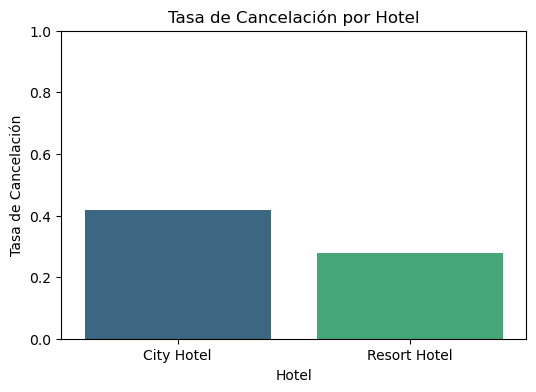

In [71]:
# Agrupar por hotel y calcular las métricas necesarias
resumen_cancelaciones = df_clean.groupby('hotel').agg(
    total_reservas=pd.NamedAgg(column='is_canceled', aggfunc='count'),
    reservas_canceladas=pd.NamedAgg(column='is_canceled', aggfunc='sum')
).reset_index()

# Calcular la tasa de cancelación
resumen_cancelaciones['tasa_cancelacion'] = resumen_cancelaciones['reservas_canceladas'] / resumen_cancelaciones['total_reservas']

# Mostrar el resumen de cancelaciones
print(resumen_cancelaciones)

# Graficar la tasa de cancelación con seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='hotel', y='tasa_cancelacion', data=resumen_cancelaciones, palette='viridis')
plt.title('Tasa de Cancelación por Hotel')
plt.xlabel('Hotel')
plt.ylabel('Tasa de Cancelación')
plt.ylim(0, 1)  # Establecer el límite del eje y entre 0 y 1 para la tasa
plt.show()

**La tasa de cancelación del City Hotel es 41.7% y del Resort Hotel solo del 27.9%**. Además, se observa que las reservas del City Hotel son practicamente el doble de las del Resort Hotel.

Sería interesante contrastar la tasa de reserva efectiva y de cancelación en cada hotel, para análizar las reservas que dejan ganancias a los hoteles.

In [77]:
# Agrupar por hotel y calcular las métricas necesarias
resumen_cancelaciones1 = df_clean.groupby('hotel').agg(
    total_reservas=pd.NamedAgg(column='is_canceled', aggfunc='count'),
    reservas_canceladas=pd.NamedAgg(column='is_canceled', aggfunc='sum')
).reset_index()

# Calcular el número de reservas no canceladas
resumen_cancelaciones['reservas_no_canceladas'] = resumen_cancelaciones['total_reservas'] - resumen_cancelaciones['reservas_canceladas']

# Calcular las tasas
resumen_cancelaciones['tasa_cancelacion'] = resumen_cancelaciones['reservas_canceladas'] / resumen_cancelaciones['total_reservas']
resumen_cancelaciones['tasa_no_cancelacion'] = resumen_cancelaciones['reservas_no_canceladas'] / resumen_cancelaciones['total_reservas']

# Mostrar el resumen de cancelaciones
print(resumen_cancelaciones)



          hotel  total_reservas  reservas_canceladas  tasa_cancelacion  \
0    City Hotel           79302                33076          0.417089   
1  Resort Hotel           39596                11077          0.279750   

   reservas_no_canceladas  tasa_no_cancelacion  
0                   46226             0.582911  
1                   28519             0.720250  


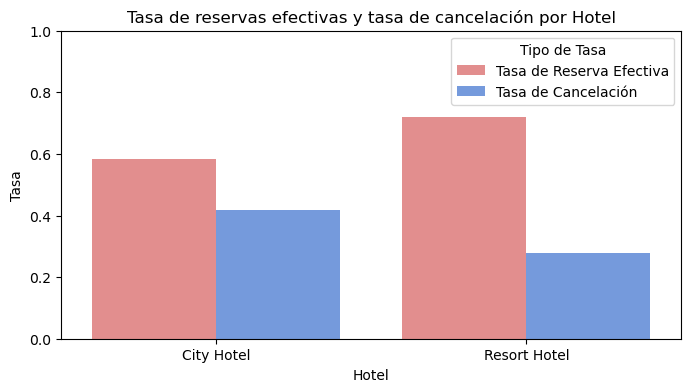

In [103]:
# Crear un DataFrame para las tasas
df_tasas = pd.melt(resumen_cancelaciones, id_vars=['hotel'], value_vars=['tasa_no_cancelacion', 'tasa_cancelacion'],
                   var_name='Tipo de Tasa', value_name='Tasa')

# Renombrar los valores en la columna 'Tipo de Tasa' para una mejor visualización
df_tasas['Tipo de Tasa'] = df_tasas['Tipo de Tasa'].map({
    'tasa_cancelacion': 'Tasa de Cancelación',
    'tasa_no_cancelacion': 'Tasa de Reserva Efectiva'
})

# Graficar las tasas con seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='hotel', y='Tasa', hue='Tipo de Tasa', data=df_tasas, palette=['#F08080', '#6495ED'])
plt.title('Tasa de reservas efectivas y tasa de cancelación por Hotel')
plt.xlabel('Hotel')
plt.ylabel('Tasa')
plt.ylim(0, 1)  # Establecer el límite del eje y entre 0 y 1 para las tasas
plt.legend(title='Tipo de Tasa')
plt.show()

En ambos hoteles se aprecia que **la tasa de cancelación es menor a las reservas efectivas**, sin embargo, el Hotel Resort tiene mayor tasa de reserva efectiva respecto del City Hotel. Es poco probable que un hotel tenga una tasa de cancelación igual a cero, **una tasa de cancelación bajo el 50% podría considerarse apropiada**.

A continuación el analisis se centrará en los huespedes, **una hipotesis es que el Hotel Resort tiene reservas relacionadas al concepto de vacaciones** por eso, debiese haber más de un huesped por reserva o presencia de niños. Por ese motivo calcularemos el promedio de niños por hotel, para eso utilizamos la variable "Kids" que fue unas de las que se crearon en el notebook "manejo de datos".

In [193]:
promedio_kids = df_clean.groupby('hotel')['kids'].mean().reset_index()
promedio_kids.rename(columns={'kids': 'Promedio de niños'}, inplace=True)
print(promedio_kids)

          hotel  Promedio de niños
0    City Hotel           0.096341
1  Resort Hotel           0.143828


In [140]:
promedio_adultos = df_clean.groupby(['hotel'])['adults'].mean().reset_index()
promedio_huespedes.rename(columns={'adults': 'Promedio de adultos'}, inplace=True)
print(promedio_adultos)

          hotel    adults
0    City Hotel  1.851126
1  Resort Hotel  1.872942


**No se aprecia que la cantidad de niños este influenciada por el tipo de hotel**, ya que el promedio de niños por reserva es practicamente cero para los dos hoteles. Lo mismo ocurre con la cantidad de adultos donde el promedio es practicamente 2 huespedes.**

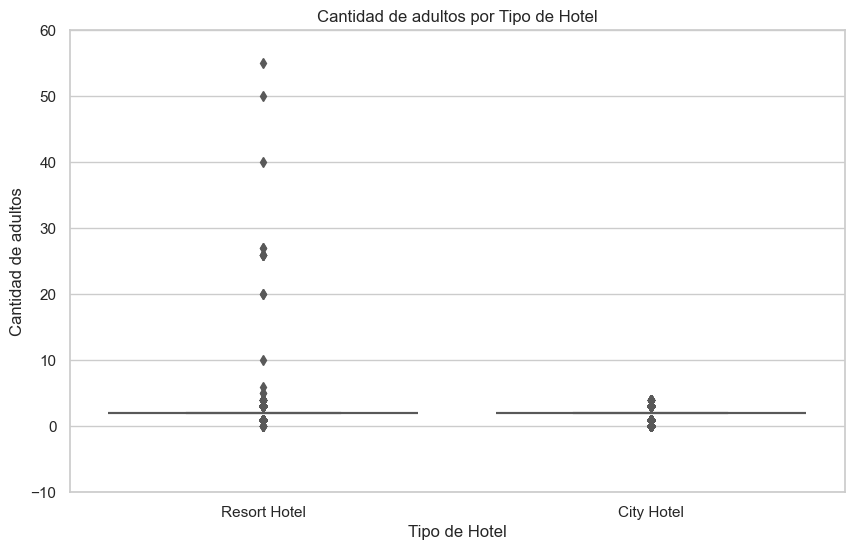

In [445]:
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='hotel', y='adults', data=df_clean, palette='Set2')
ax.set_title('Cantidad de adultos por Tipo de Hotel')
ax.set_xlabel('Tipo de Hotel')
ax.set_ylabel('Cantidad de adultos')
plt.ylim(-10, 60)
plt.show()

La afirmación anterior la podemos respaldar con el gráfico de BOXPLOT, que contrasta la cantidad de adultos por cada hotel y se ven los datos concentrados entorno a 1 y 2, que es justamente el valor promedio. Si bien, se observan algunos valores elevados en el Hotel Resort, se decidió no eliminarlos, ya que en la descripción de las variables aparece que las reservas puedes ser realizadas por agencias turisticas, en estos caso la cantidad de huespedes por reserva puede verse incrementado.

Ya que no es posible inferir con la cantidad promedio de huespedes por hotel que el Resort es para vacaciones, **verificaremos la cantidad de días de estadia en cada hotel.**

In [395]:
promedio_estadia = df_clean.groupby(['hotel'])['dias_estadia_1'].mean().reset_index()
print(promedio_estadia)

          hotel  dias_estadia_1
0    City Hotel        2.978235
1  Resort Hotel        4.337913


**Con esto vemos que el promedio de días de estadia es mayor en el Hotel Resort**, veamos como se comporta los días de estadia con un bloxplot.

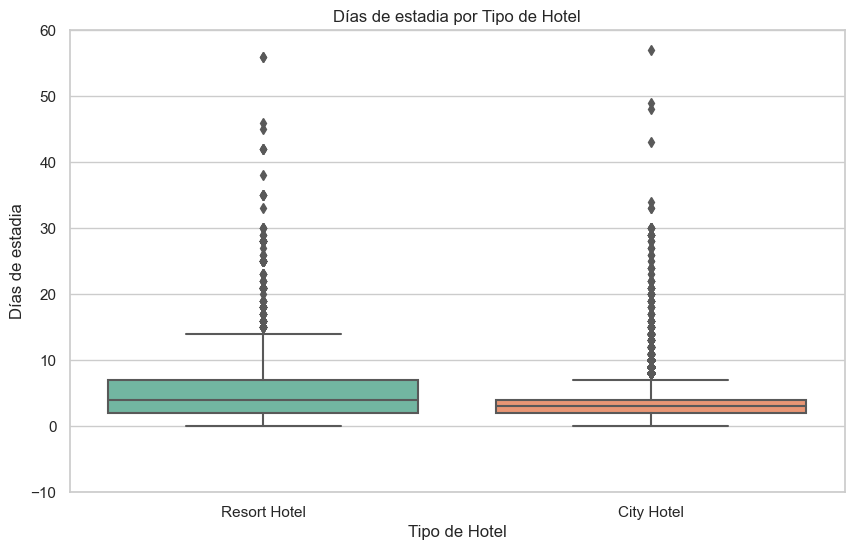

In [186]:
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='hotel', y='dias_estadia_1', data=df_clean, palette='Set2')
ax.set_title('Días de estadia por Tipo de Hotel')
ax.set_xlabel('Tipo de Hotel')
ax.set_ylabel('Días de estadia')
plt.ylim(-10, 60)
plt.show()

Efectivamente los días de estadia en el Hotel Resort suele ser mayor con respecto al Hotel de la Ciudad, este podría hacernos retomar la hipotes hipotesis referente a que las reservaciones del Hotel Resort son por concepto de vacaciones, **veamos las reservas por mes como complemento.**

In [456]:
#lo primero es crear la variable opuesta a 'is_canceled' para identificar la cantidad de reservas efectivas "not_canceled"
df_clean['not_canceled'] = df_clean['is_canceled'].apply(lambda x: 1 if x == 0 else 0) 


In [359]:
#df_clean.head()

           hotel  month arrival_date_month  not_canceled
0     City Hotel      1            January           926
1     City Hotel      2           February          1441
2     City Hotel      3              March          1938
3     City Hotel      4              April          2022
4     City Hotel      5                May          2240
5     City Hotel      6               June          2203
6     City Hotel      7               July          2088
7     City Hotel      8             August          2131
8     City Hotel      9          September          2304
9     City Hotel     10            October          2272
10    City Hotel     11           November          1761
11    City Hotel     12           December          1406
12  Resort Hotel      1            January           732
13  Resort Hotel      2           February          1080
14  Resort Hotel      3              March          1374
15  Resort Hotel      4              April          1323
16  Resort Hotel      5        

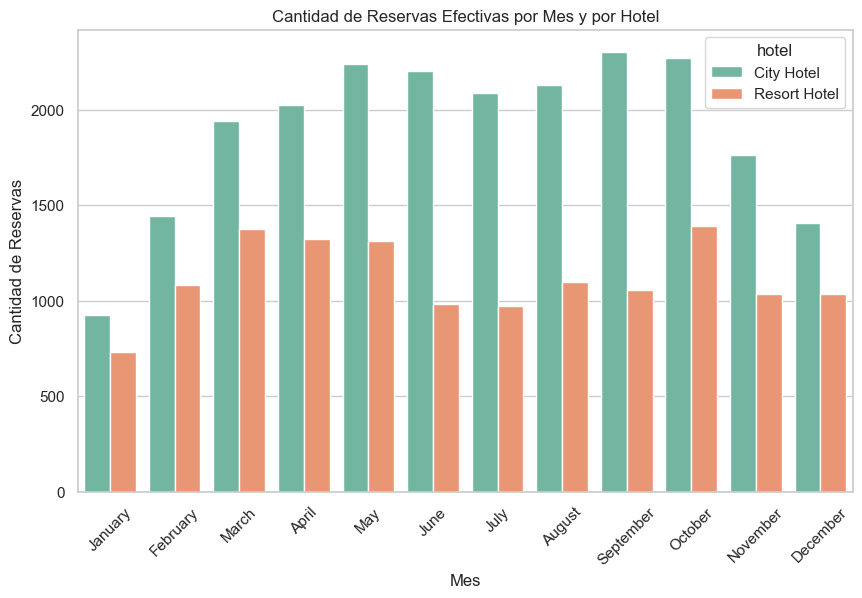

In [377]:
df_year_2016 = df_clean[df_clean['arrival_date_year'] == 2016] #solo tomamos el año 2016

reservas_por_mes_hotel = df_year_2016.groupby(['hotel', 'month', 'arrival_date_month'])['not_canceled'].sum().reset_index()
print(reservas_por_mes_hotel)
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='arrival_date_month', y='not_canceled', hue='hotel', data=reservas_por_mes_hotel, palette='Set2')

# Agregar título y etiquetas
ax.set_title('Cantidad de Reservas Efectivas por Mes y por Hotel')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Reservas')
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

Los resultados obtenidos de los análisis no permiten confirmar la hipotesis de que el hotel resort recibe reservaciones orientadas a la tematica vacacional, ya que la cantidad de reserva es similar en los diferentes meses, sin embargo en ambos hoteles vemos que el mes de enero es el que menos reservas efectivas mantiene.

Por lo anterior dirigiremos el análisis hacia otro ambito, nos centraremos en el valor por noche y en identificar cuando se producen los peak de reservas efectivas. Ahora bien, para ver si existen tendencias estacionales por tipo de hotel debemos verificar las reservas efectivas, sin embargo solo consideraremos los datos del año 2016, ya que el DataSet considera un periodo de 26 meses, esto provoca que las cifras de 2 meses se vean incrementadas por considerar las reservas de 3 periodos mientras que los otros solo consideran 2.

           hotel  month arrival_date_month         adr
0     City Hotel      1            January   82.628986
1     City Hotel      2           February   85.088278
2     City Hotel      3              March   92.643116
3     City Hotel      4              April  111.311363
4     City Hotel      5                May  121.638560
5     City Hotel      6               June  119.074341
6     City Hotel      7               July  110.734292
7     City Hotel      8             August  114.718346
8     City Hotel      9          September  110.004661
9     City Hotel     10            October  100.039001
10    City Hotel     11           November   88.090090
11    City Hotel     12           December   88.890845
12  Resort Hotel      1            January   49.673157
13  Resort Hotel      2           February   55.445661
14  Resort Hotel      3              March   57.802130
15  Resort Hotel      4              April   78.144752
16  Resort Hotel      5                May   78.820186
17  Resort

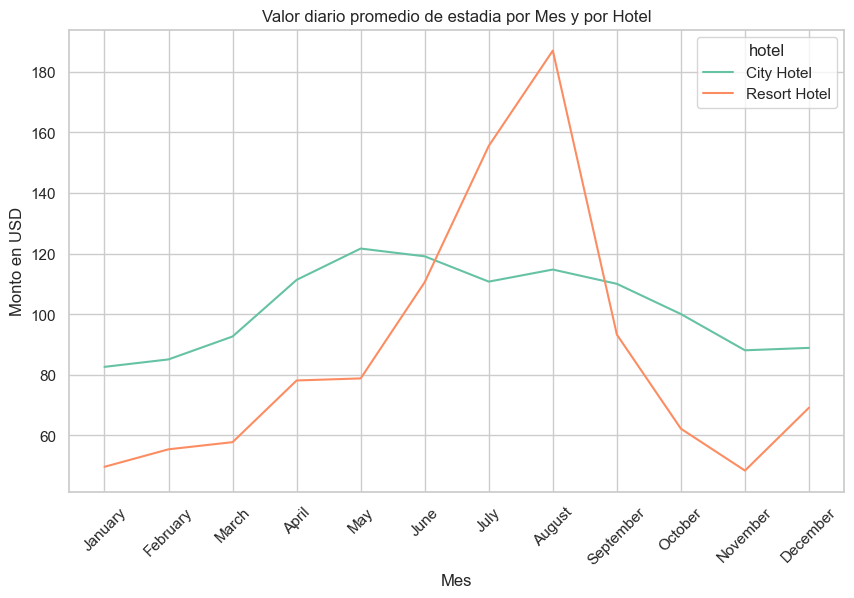

In [412]:
valor_estadia = df_clean.groupby(['hotel', 'month', 'arrival_date_month'])['adr'].mean().reset_index()
print(valor_estadia)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=valor_estadia, palette='Set2')

# Agregar título y etiquetas
ax.set_title('Valor diario promedio de estadia por Mes y por Hotel')
ax.set_xlabel('Mes')
ax.set_ylabel('Monto en USD')
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

Los resultados del gráfico anterior son interesantes en el sentido que el valor diario promedio de estadia para el Hotel Resort son considerablemente más altos para los meses de Julio y Agosto, meses que se consideran periodo vacacional, esto puede estar afectando la cantidad de reservas efectivas en esos periodos, es decir, **como el costo por noche en ese periodo los huespedes prefieren reservar en los periodos que los valores son menores, por  ejemplo, marzo, abril, mayo y octubre.**

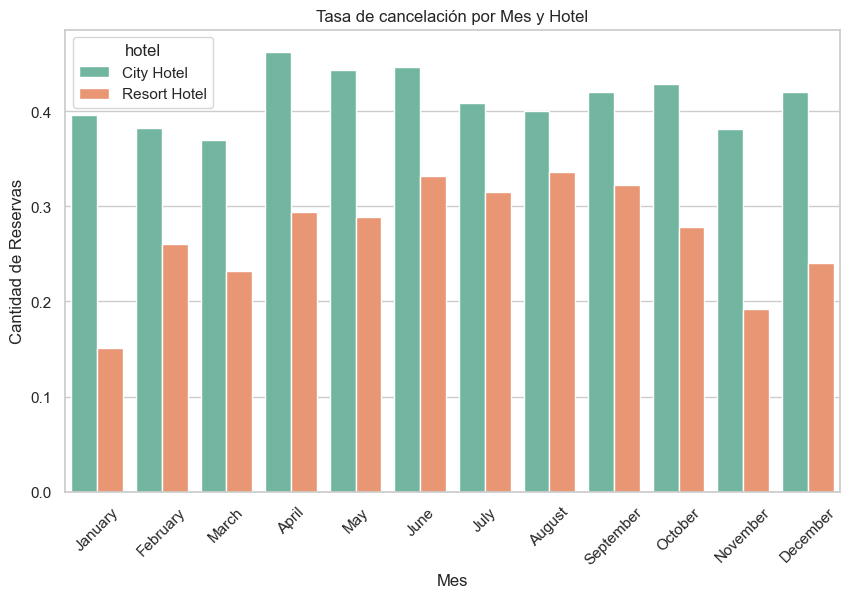

In [367]:
reservas_por_mes_hotel = df_clean.groupby(['hotel', 'month', 'arrival_date_month'])['not_canceled'].sum().reset_index()
reservas_canceladas_por_mes_hotel = df_clean.groupby(['hotel', 'month', 'arrival_date_month'])['is_canceled'].sum().reset_index()
#print(reservas_por_mes_hotel)
#print(reservas_canceladas_por_mes_hotel)
#df_reservas_mes_merged = pd.merge(reservas_por_mes_hotel, reservas_canceladas_por_mes_hotel, on=['hotel', 'month', 'arrival_date_month'], how='inner')

#df_reservas_mes_merged['total_reservas'] = (df_reservas_mes_merged['not_canceled'] + df_reservas_mes_merged['is_canceled'])
#df_reservas_mes_merged['tasa_reservas_efectivas'] = (df_reservas_mes_merged['not_canceled'] / df_reservas_mes_merged['total_reservas'])
#print("\nDataFrame cruzado (inner join):\n", df_reservas_mes_merged)
df_reservas_mes_merged['tasa_reservas_canceladas'] = (df_reservas_mes_merged['is_canceled'] / df_reservas_mes_merged['total_reservas'])
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='arrival_date_month', y='tasa_reservas_canceladas', hue='hotel', data=df_reservas_mes_merged, palette='Set2')

# Agregar título y etiquetas
ax.set_title('Tasa de cancelación por Mes y Hotel')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Reservas')
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

Como complemento, al graficar la tasa de cancelación por mes y por hotel, podemos apreciar que la tasa del City Hotel se mantiene relativamente constante, mientras que el Resort Hotel presenta alzas a mediados de año, que podrian ser los meses de verano dependiendo del origen de los huespedes. 

### País de Origen

In [436]:
pais_origen = df_clean.groupby(['hotel', 'country'])['not_canceled'].sum().reset_index()
print(pais_origen)

            hotel country  not_canceled
0      City Hotel     ABW             2
1      City Hotel     AGO           140
2      City Hotel     AIA             1
3      City Hotel     ALB             8
4      City Hotel     AND             0
..            ...     ...           ...
286  Resort Hotel     VEN             2
287  Resort Hotel     VNM             2
288  Resort Hotel     ZAF            13
289  Resort Hotel     ZMB             1
290  Resort Hotel     ZWE             2

[291 rows x 3 columns]


## Propuesta de Aplicación Práctica

En base a los análisis realizados se considera que las siguientes sugerencias serían de utilidad para ambos hoteles:

- Crear campañas que permitan disminuir la tasa de cancelación, por ejemplo, enviar correos recordando la reserva, o solicitar el registro de un medio de pago.
- En los periodos de verano incluir ofertas para aumentar las reservas efectivas.